2. Trabaje con el dataset de Scikit Learn “wine”1: 

  a. Utilice  el  metadata  que  provee  la  librería,  ¿Cuál  es  el  tema  que 
aborda el dataset?


In [2]:
import pandas as pd 

from sklearn.datasets import load_wine

wine = load_wine()

print("Podemos ver los nombres de las features del dataset " + str(wine.feature_names))

Podemos ver los nombres de las features del dataset ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
wine.data[:5]


array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

El tema que aborda el dataset son variedades de Vinos y sus diferentes caracteristicas.

b. Genere el árbol de decisión que permita clasificar los diferentes tipos de vino utilizando un muestreo con proporciones de 80% para 
entrenamiento y 20% para testeo.


In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.20)
#data_train, data_test, target_train, target_test
arbol = tree.DecisionTreeClassifier(criterion="entropy")

# Entreno el Decision Tree Classifer
arbol = arbol.fit(X_train,y_train)

#Realizo las predicciones en función del árbol generado
y_pred = arbol.predict(X_test)

from sklearn import metrics #Importar el módulo metrics de scikit-learn

# Vamos a testear el modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [6]:
import numpy as np
wines = np.array(y_test)
predictions = np.array(y_pred)

metrics.confusion_matrix(wines, predictions)

array([[13,  1,  0],
       [ 0, 15,  1],
       [ 0,  0,  6]])

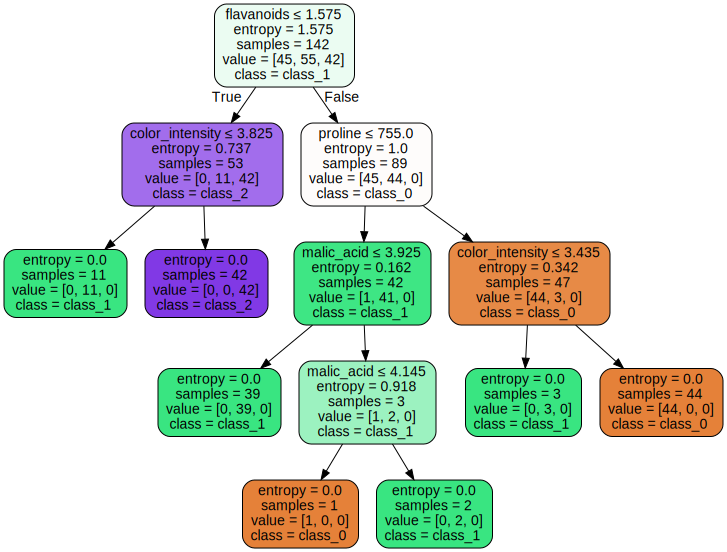

In [7]:
!pip install graphviz

import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

Accuracy: 0.9444444444444444


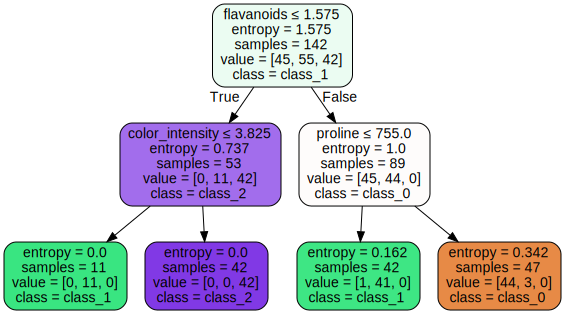

In [50]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.20
                                                    )

arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=4)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = tree.export_graphviz(arbol_parametrizado, out_file=None,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph